In [132]:
import pandas as pd
from random import choices
from venn import pseudovenn
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
'''Generating 6 sets with 100 random numbers each ranging from 1 to 1000'''

#sets size
size = 50

#range
values = range(100)

#sets
A = set(choices(values, k=size))
B = set(choices(values, k=size))
C = set(choices(values, k=size))
D = set(choices(values, k=size))
E = set(choices(values, k=size))
F = set(choices(values, k=size))

#sets list
list_sets = [A, B, C, D, E, F]

#sets order
order_sets= ['A','B','C','D','E','F']


In [134]:
#Function to combine sets
def intersection(sets):
    '''The function makes the intersections between all sets and\
     returns a list with the position of the sets (name) and a\
     list with the elements of each set (conj)'''
    conj = []
    name = []
    for i in range(len(sets)):
        set_1 = sets[i]
        for n in range(len(sets)):
            set_2 = sets[n]
            for k in range(len(sets)):
                set_3 = sets[k]
                for p in range(len(sets)):
                    set_4 = sets[p]
                    for t in range(len(sets)):
                        set_5 = sets[t]
                        for x in range(len(sets)):
                            set_6 = sets[x]
                            set_i = set_1 & set_2 & set_3 & set_4 & set_5 & set_6
                            for j in range(len(sets)):
                                if j != i and j != n and j != k and j != p and j != t and j != x:
                                    temp = set_i - sets[j]
                                    set_i = temp
                            if set_i not in conj:
                                conj.append(set_i)
                                name.append([i,n,k,p,t,x])
    return conj, name

#Function to create the final table
def table(conj, name):
    '''The function returns a table with the results\
     including the intersection sets, the quantity\
     and percentage of elements in the set.'''
    result = pd.DataFrame()
    result['intersection'] = [set(name[i]) for i in range(len(name))]
    result['sets'] = [set(conj[i]) for i in range(len(conj))]
    result['value'] = [len(conj[i]) for i in range(len(conj))]
    result['percentage'] = round(result['value'] * (100/sum(list(result['value']))),2)
    result['num_sets'] = [len(set(name[i])) for i in range(len(name))]
    result = result.sort_values(by = 'value', ascending = False).reset_index(drop=True)
    vector1 = []
    for i in range(len(result)):
        temp = list(result['intersection'][i])
        vector = []
        for j in range(len(temp)):
            temp1 = temp[j]
            vector.append(order_sets[temp1])
        temp3 = set(vector)
        vector1.append(temp3)
    result['set_name'] = vector1
    return result

In [135]:
#Intersections
conj, nome = intersection(list_sets)
#Final result
result = table(conj, nome)

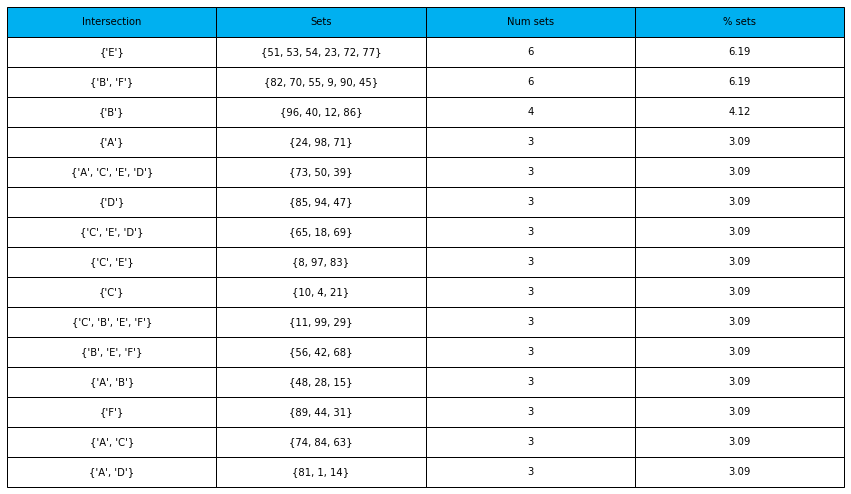

In [136]:
'''Plotting the table with the results'''

data_table = result[['set_name', 'sets', 'value', 'percentage']].head(15).values.tolist()
table = plt.table(cellText=data_table, colLabels=['Intersection', 'Sets', 'Num sets', '% sets'], loc='center', 
                  cellLoc='center', colColours=['#00B0F0', '#00B0F0', '#00B0F0', '#00B0F0'])
table.auto_set_font_size(False)
table.scale(2.5, 2.5)
h = table.get_celld()[(0,0)].get_height()
w = table.get_celld()[(0,0)].get_width()

plt.axis('off')
plt.show()

<AxesSubplot:>

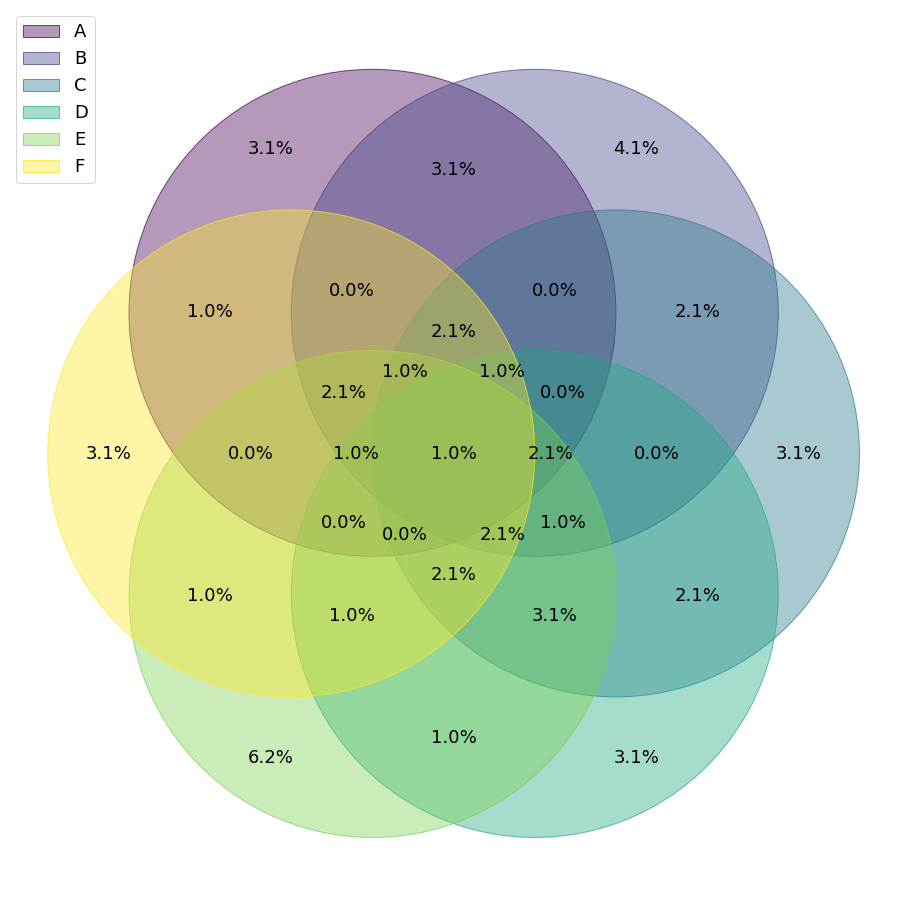

In [137]:
'''Plotting Venn Diagram with pseudovenn'''

#Creating a dictionary with sets
data_chart = dict(zip(order_sets, list_sets))

#Chart
pseudovenn(data_chart, cmap="viridis", hint_hidden=False, fontsize=18, legend_loc="upper left", fmt="{percentage:.1f}%", figsize=(16,18))